# Exploratory Data Analysis Exercise
* For this part we will be using the `data/cars.csv` dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline 
import scipy.stats as stats


# Load in the data
* Use the file in the data folder called 'cars.csv'
* Save it as a varible named 'df'
* Display the first 5 rows of our dataframe

In [2]:
# Load data
df=pd.read_csv('data/cars.csv')
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


In [3]:
#make some sense of data
#number of columns and rows
print(df.shape)
#data type
print("\n")
print(df.dtypes)
#describe data
print("\n")
print(df.describe())

(11914, 15)


Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object


               Year    Engine HP  Engine Cylinders  Number of Doors  \
count  11914.000000  11845.00000      11884.000000     11908.000000   
mean    2010.384338    249.38607          5.628829         3.436093   
std        7.579740    109.19187          1.780559         0.881315   
min     1990.000000     55.00000          0.000000         2.000000   
25%     2007.000000    170.00000          4.000000         2.000000   
50%     2015.000000    227.00000          6.000000         4.000000   
75%     2016.000000    300.00000      

# Data clean up part 1.

1. Print the number of duplicate rows we have in our dataframe.

2. Modify our df to have all duplicate rows removed. 

3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

In [4]:
# 1. Print the number of duplicate rows we have in our dataframe.
print(df.duplicated().sum())


720


In [5]:
#  2. Modify our df to have all duplicate rows removed. 
df=df.drop_duplicates()


In [6]:
# 3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.
print(df.duplicated().sum())


0


# Data clean up part 2.
* Which column has the most null values and how many null values does it have?
* Print how long our dataframe is.
* Remove any row that has a null value in it. 
* Do a sanity check and pring how long our dataframe is now that we have removed our null values.

In [7]:
# * Which column has the most null values and how many null values does it have?
# def columnWithMostNullValues(df):

#to check each columns 
print(df.isnull().sum())

#picking up the column iwth most null values
max_nullVal=0
for column in df.columns:
    if df.isnull().sum()[column]>max_nullVal:
        column_name=column
        max_nullVal=df.isnull().sum()[column]
print("The column {} seems to have the most null values which are {}".format(column_name,max_nullVal))
    


Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64
The column Engine HP seems to have the most null values which are 69


In [8]:
#Another way to do it. 
target = df.isnull().sum().reset_index()
target.max()

index    highway MPG
0                 69
dtype: object

In [9]:
# * Print how long our dataframe is.
print("We have {} columns in our data with {} rows".format(df.shape[1],df.shape[0]))


We have 15 columns in our data with 11194 rows


In [10]:
# * Remove any row that has a null value in it. 
df=df.dropna()


In [11]:
# * Do a sanity check and pring how long our dataframe is now that we have removed our null values.
print("After dropping the null values. we have {} columns in our data with {}  rows : ".format(df.shape[1],df.shape[0]))


After dropping the null values. we have 15 columns in our data with 11092  rows : 


### Make a bar chart that displays how many times each brand of car appears in this data. 
_Brand of car is the `Make` of the car._
* You can achieve this by using value_counts or by a groupby.  Either is fine with me. 

 Notes:
 ----------------------------------------------------------------------------------------------------------
.groupby(col).count() should be used when you want to find the frequency of valid values present in 
columns with respect to specified col.

 .value_counts() should be used to find the frequencies of a series.

<AxesSubplot:title={'center':'Cars by company'}, xlabel='Company', ylabel='frequency'>

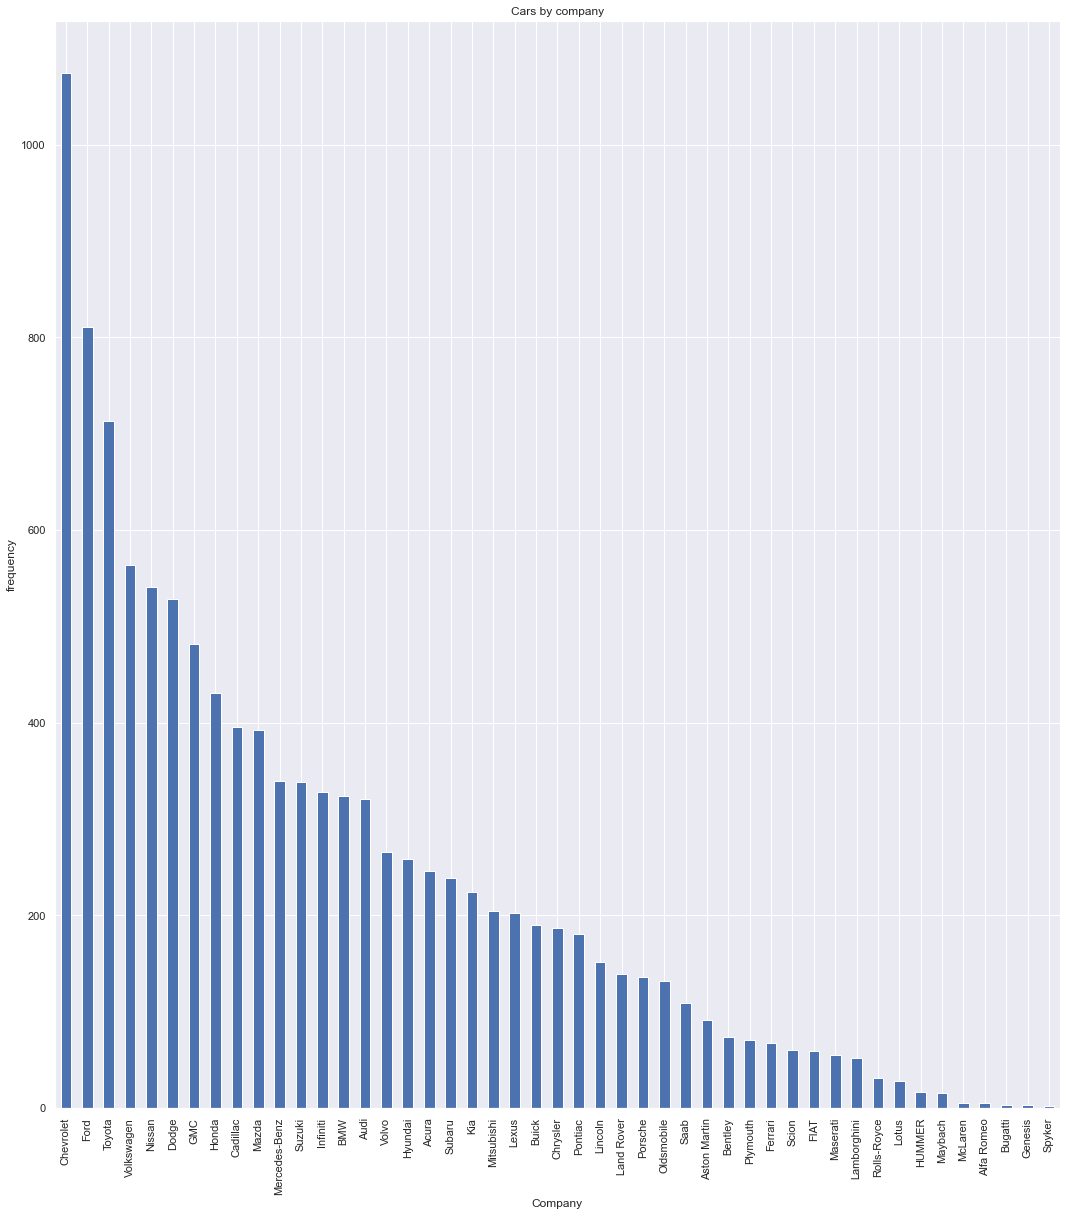

In [12]:
# Make a bar chart that displays how many times each brand of car appears in this data. 

#using value_counts()
g=df.Make.value_counts()
g.plot.bar(xlabel='Company', ylabel='frequency',title = 'Cars by company', figsize=(18,20))

# #using groupBy
# gb = df.groupby('Make').count()
# gb['Model'].plot.bar(xlabel='Company', ylabel='frequency',title = 'Cars by company', figsize=(18,20))


# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.  And also sort the values so the bar chart displays from lowest to highest.

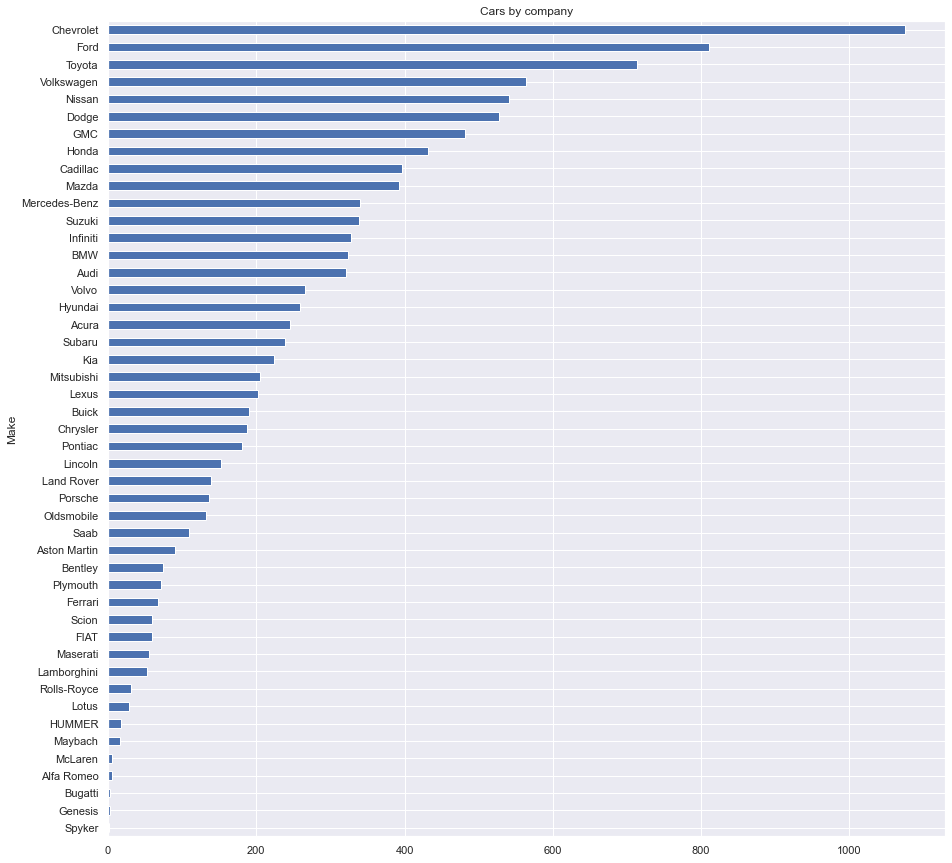

In [13]:
# Make the cart more legible, by making it a horizontal bar chart, sorting the values, and changing the figure size.

g.sort_values(ascending=True).plot(kind='barh', xlabel='Make', ylabel='frequency', figsize=(15,15),title = 'Cars by company');

### Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
* What's noticeable about it and what do you think the error is...


In [14]:
# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
#check the data again
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


In [ ]:
# pip install plotly==5.3.1

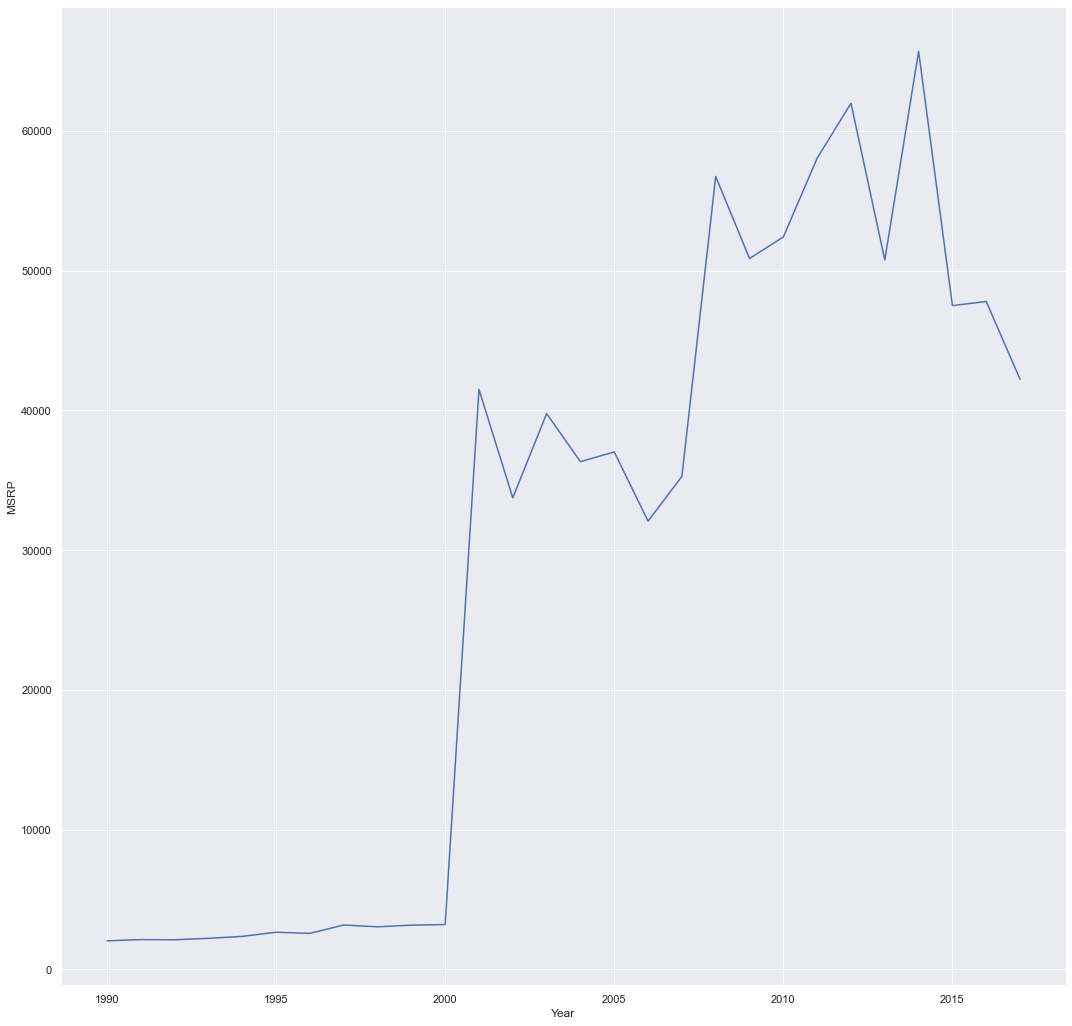

In [15]:
# import plotly.express as px

plt.figure(figsize = (18,18))
new_df = df.groupby('Year').mean().reset_index()
new_fig = sns.lineplot(x = 'Year', y = 'MSRP', data = new_df)







# fig = px.timeline(g, x_start="Year", x_end="Year", y="MSRP")
# fig

In [ ]:
# from the fig above, we see that the average MSRP from 2001 up to 2017 was more greater than 
# the avreage MSRP for the years in the interval 1990-2000. 
# that it may be happaned because the data was wrongly collected for the interval 1990-2000


# It seems as though in the years before (and includig) 2000, they were counting in tens.
Make a new column that is called `adjusted_price`, that contains all prices, however, for every year before 2000 make it 10x the original MSRP.  
   * Hint; you might need to use our old friend `np.where`

In [17]:
# Make a column where is 10 when year is less than 2000, else 1.

cond1=df['Year']<=2000
df['new_price']=np.where(cond1,10,1)
# df

# Multiply the MSRP by the price adjuster.

df['adjusted_price']=df['MSRP']*df['new_price']
df.head(3)



,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,new_price,adjusted_price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,1,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650,1,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350,1,36350


# Replot the new adjusted price.  
* Make the y-axis start at 0 and go up to 100,000

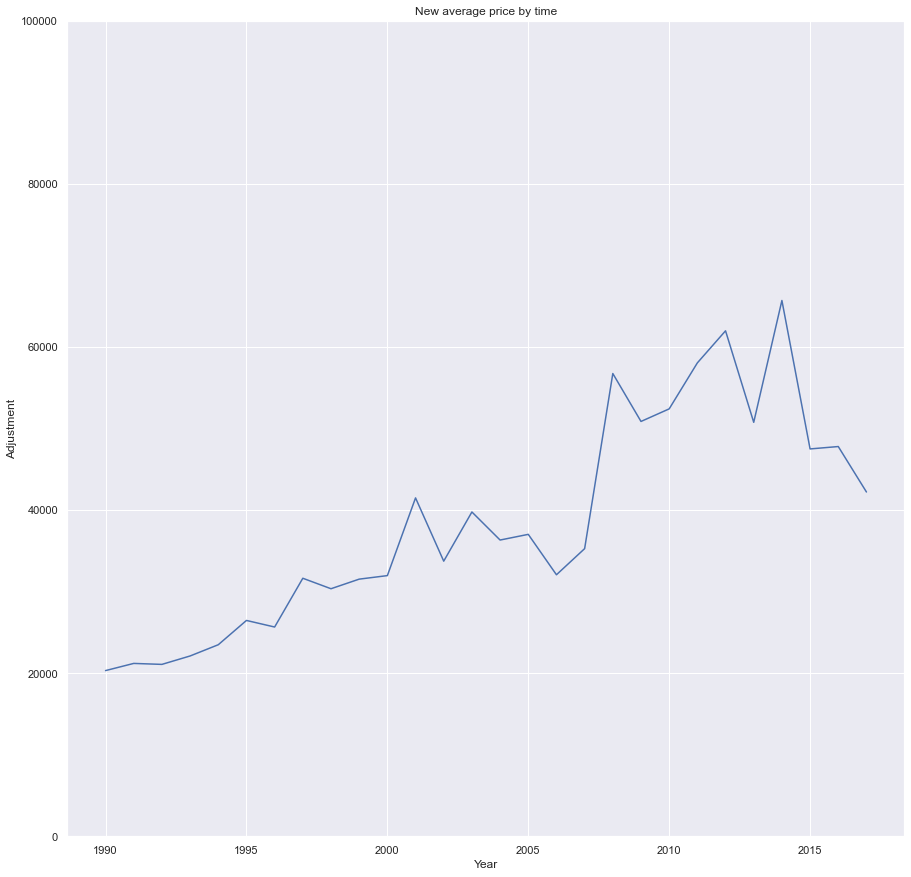

In [18]:
# Plot new prices

plt.figure(figsize = (15,15))
new_df = df.groupby('Year').mean().reset_index()
new_fig = sns.lineplot(x = 'Year', y = 'adjusted_price', data = new_df)
new_fig.set(ylabel = 'Adjustment', title = 'New average price by time', ylim = (0,100000))
plt.show(new_fig)



# What are top 5 car makers that make the most expensive cars on average. 
* I only want the top 5, make sure your answer is the top 5 and only the top 5. (hint, you can use .head())
* Use our `adjusted_price` column for this
* Hint; you're going to have to do a .groupby to answer this.

In [19]:
# What are the top 5 car makers make the most expensive cars on average. 
cond=df.groupby('Make')['adjusted_price'].mean()
top_5=cond.sort_values(ascending=False)
top_5.head(5)


Make
Bugatti        1.757224e+06
Maybach        5.462219e+05
Rolls-Royce    3.511306e+05
Lamborghini    3.315673e+05
Bentley        2.471693e+05
Name: adjusted_price, dtype: float64

In [20]:
#Alternative way to do it:
new_df = df.groupby('Make')['adjusted_price'].mean().reset_index()
new_df = new_df.sort_values('adjusted_price',ascending = False)
new_df['Make'].head(5)

6         Bugatti
28        Maybach
38    Rolls-Royce
22    Lamborghini
5         Bentley
Name: Make, dtype: object

# What are the 5 car makers that have the highest median highway MPG?

In [22]:
# Which car makers have the highest median highway MPG?
cond=df.groupby('Make')['highway MPG'].median()
top_5=cond.sort_values(ascending=False)
top_5.head(5)


Make
Alfa Romeo    34
FIAT          33
Volkswagen    32
Scion         32
Honda         32
Name: highway MPG, dtype: int64

In [23]:
#Alternative way to do it
new_df = df.groupby('Make').median().reset_index()
new_df = new_df.sort_values('highway MPG', ascending = False)
new_df['Make'].head(5)

1     Alfa Romeo
12          FIAT
45    Volkswagen
40         Scion
18         Honda
Name: Make, dtype: object

# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.
* ['Chevrolet', 'Ford', 'Toyota']
* Create a temp_df to store the dataframe of just these values.
* Set the 'hue='Make''.

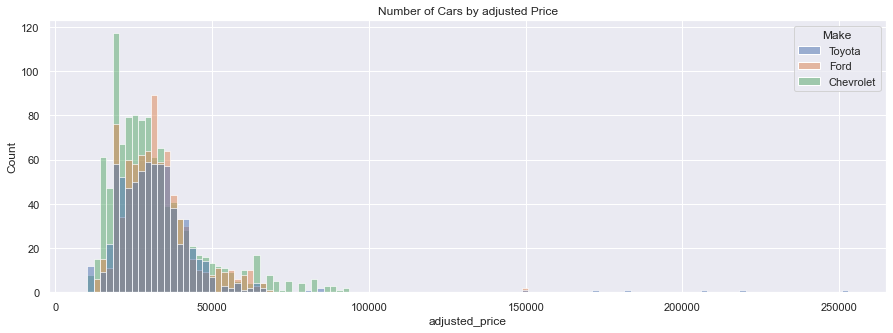

In [24]:
# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.
cond = df['Make'].isin(['Chevrolet', 'Ford', 'Toyota'])
temp_df = df[cond]
plt.figure(figsize = (15,5))

fig = sns.histplot(x = 'adjusted_price', data = temp_df, hue = 'Make')
fig.set(title = 'Number of Cars by adjusted Price')
plt.show(fig)


# Remake the same histogram, but limit the x-axis from 0 to 100,000

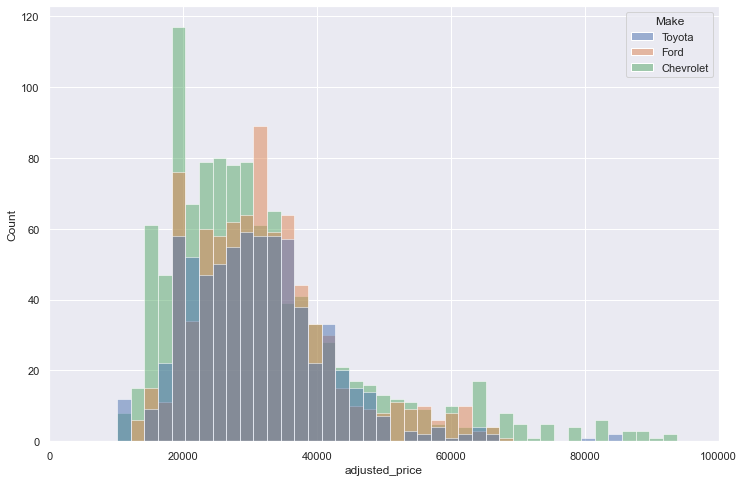

In [25]:
# Remake the same histogram, but limit the x-axis from 0 to 100,000
plt.figure(figsize = (12,8))
new_fig = sns.histplot(x = 'adjusted_price', data = temp_df, hue = 'Make')
new_fig.set(xlim = (0,100000))
plt.show(new_fig)


# Plot the relationship between Engine HP and highway MPG

[Text(0.5, 1.0, 'Relationship between Engine HP and highway MPG')]

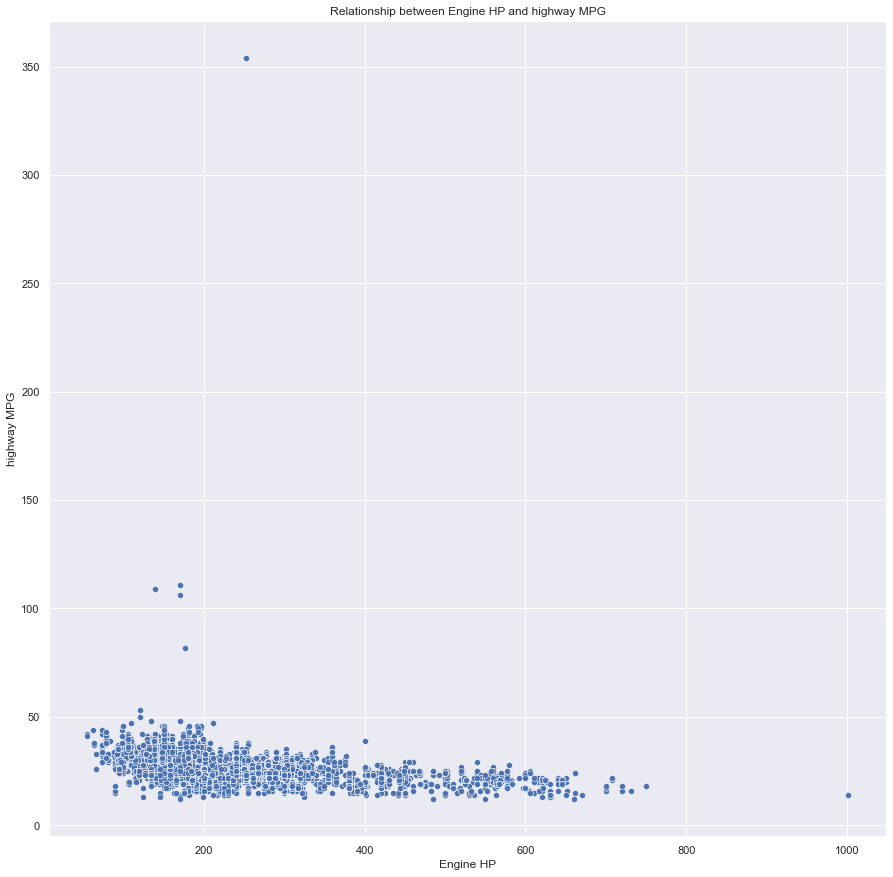

In [26]:
# Plot the relationship between Engine HP and highway MPG
plt.figure(figsize = (15,15))
sns.scatterplot(x = 'Engine HP', y = 'highway MPG', data = df).set(title = 'Relationship between Engine HP and highway MPG')

# Using `sns.boxplot`, create a boxplot for the 'Engine HP'

<AxesSubplot:xlabel='Engine HP'>

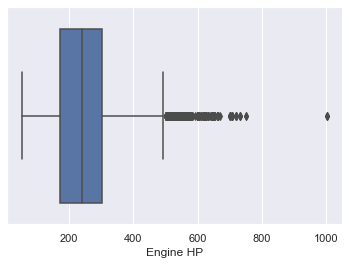

In [27]:
# create a boxplot for the 'Engine HP'
sns.boxplot(x = 'Engine HP', data = df)

# Make another boxplot for highway MPG

<AxesSubplot:xlabel='highway MPG'>

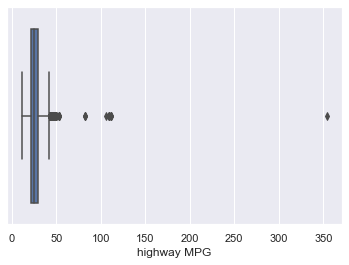

In [28]:
# create a boxplot for the 'highway MPG'
sns.boxplot(x = 'highway MPG', data = df)

# Remove any  outliers from Engine HP and highway MPG 

<img src='https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png' width=500>

* Outliers meaning values that are outside 1.5x the Inter Quartile Range (see image above).
* For each column (Engine HP and highway MPG):
* Calculate the 0.25 and 0.75 Quantiles
* Calculate the Inter Quartile Range (IQR)
* Create condition mask for the values that are outliers below (in the 'Minimum' range).
* Create condition mask for the values that are outliers above (in the 'Maximum' range).
* Filter the dataframe to remove any values that are in the above section _OR_ the below section. (hint; it may be easier to use the inverse selection '~'.
* Make the same boxplots of Engine HP and Highway MPG as before but with the this dataframe.

In [29]:
# Remove any  outliers from Engine HP and highway MPG 
def remove_outliers(targetCol):
    global df
    q1 = df[targetCol].quantile(0.25)
    q3 = df[targetCol].quantile(0.75)
    IQR = q3-q1
    outliers_below = df[targetCol] < (q1 - 1.5 * IQR)
    outliers_above = df[targetCol] > (q3 + 1.5 * IQR)
    df = df[~(outliers_below | outliers_above)]
#     return df






In [30]:
#Removing outliers for Engine HP
remove_outliers('Engine HP')

In [31]:
#removing outliers for highway MPG
remove_outliers('highway MPG')

# Remake the boxplots for both Engine HP and highway MPG


<AxesSubplot:xlabel='Engine HP'>

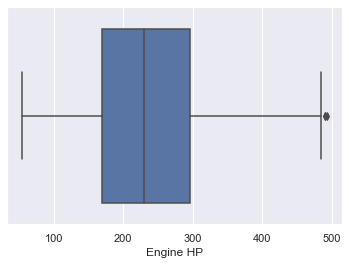

In [33]:
# Engine HP boxplot
sns.boxplot(x = 'Engine HP', data = df)

<AxesSubplot:xlabel='highway MPG'>

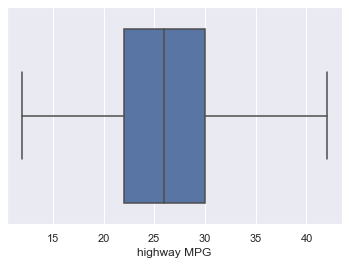

In [34]:
# highway MPG boxplot
sns.boxplot(x = 'highway MPG', data = df)


# Make a scatter plot of Engine HP vs highway MPG

[Text(0.5, 1.0, 'Relationship bet/ Engine HP and highway MPG')]

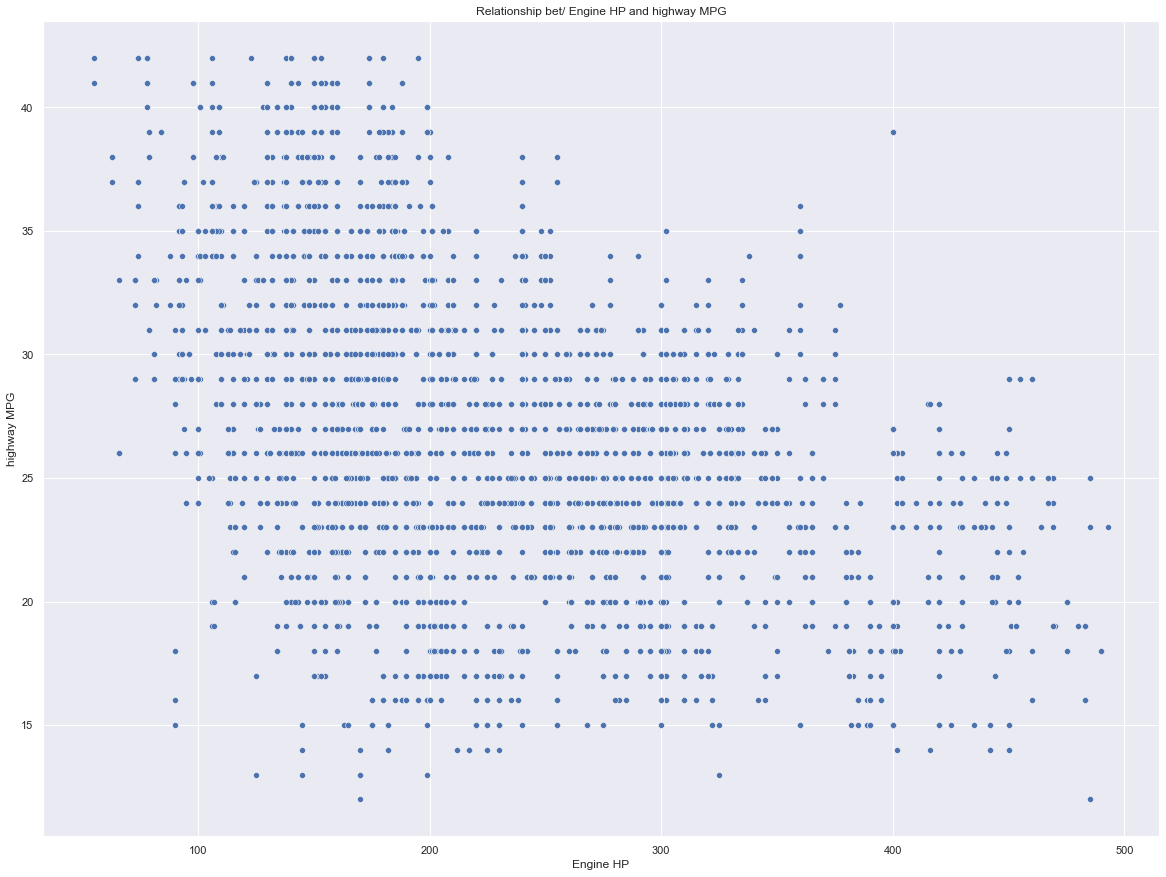

In [35]:
# Make a scatter plot of Engine HP vs highway MPG
plt.figure(figsize = (20,15))
sns.scatterplot(x = 'Engine HP', y = 'highway MPG', data = df).set(title = 'Relationship bet/ Engine HP and highway MPG')

# What does this plot tell you about how Engine HP affects highway MPG?

In [36]:
# What does this plot tell you about how Engine HP affects highway MPG?
explaining ="""
As we shift Engine HP to the right we see that highway MPG shifted down, In other words,
when Engine HP Increase that leads to highway MPG. 
"""
print(explaining)


As we shift Engine HP to the right we see that highway MPG shifted down, In other words,
when Engine HP Increase that leads to highway MPG. 



# Using a pairplot, display all of the linear relationship.
* Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

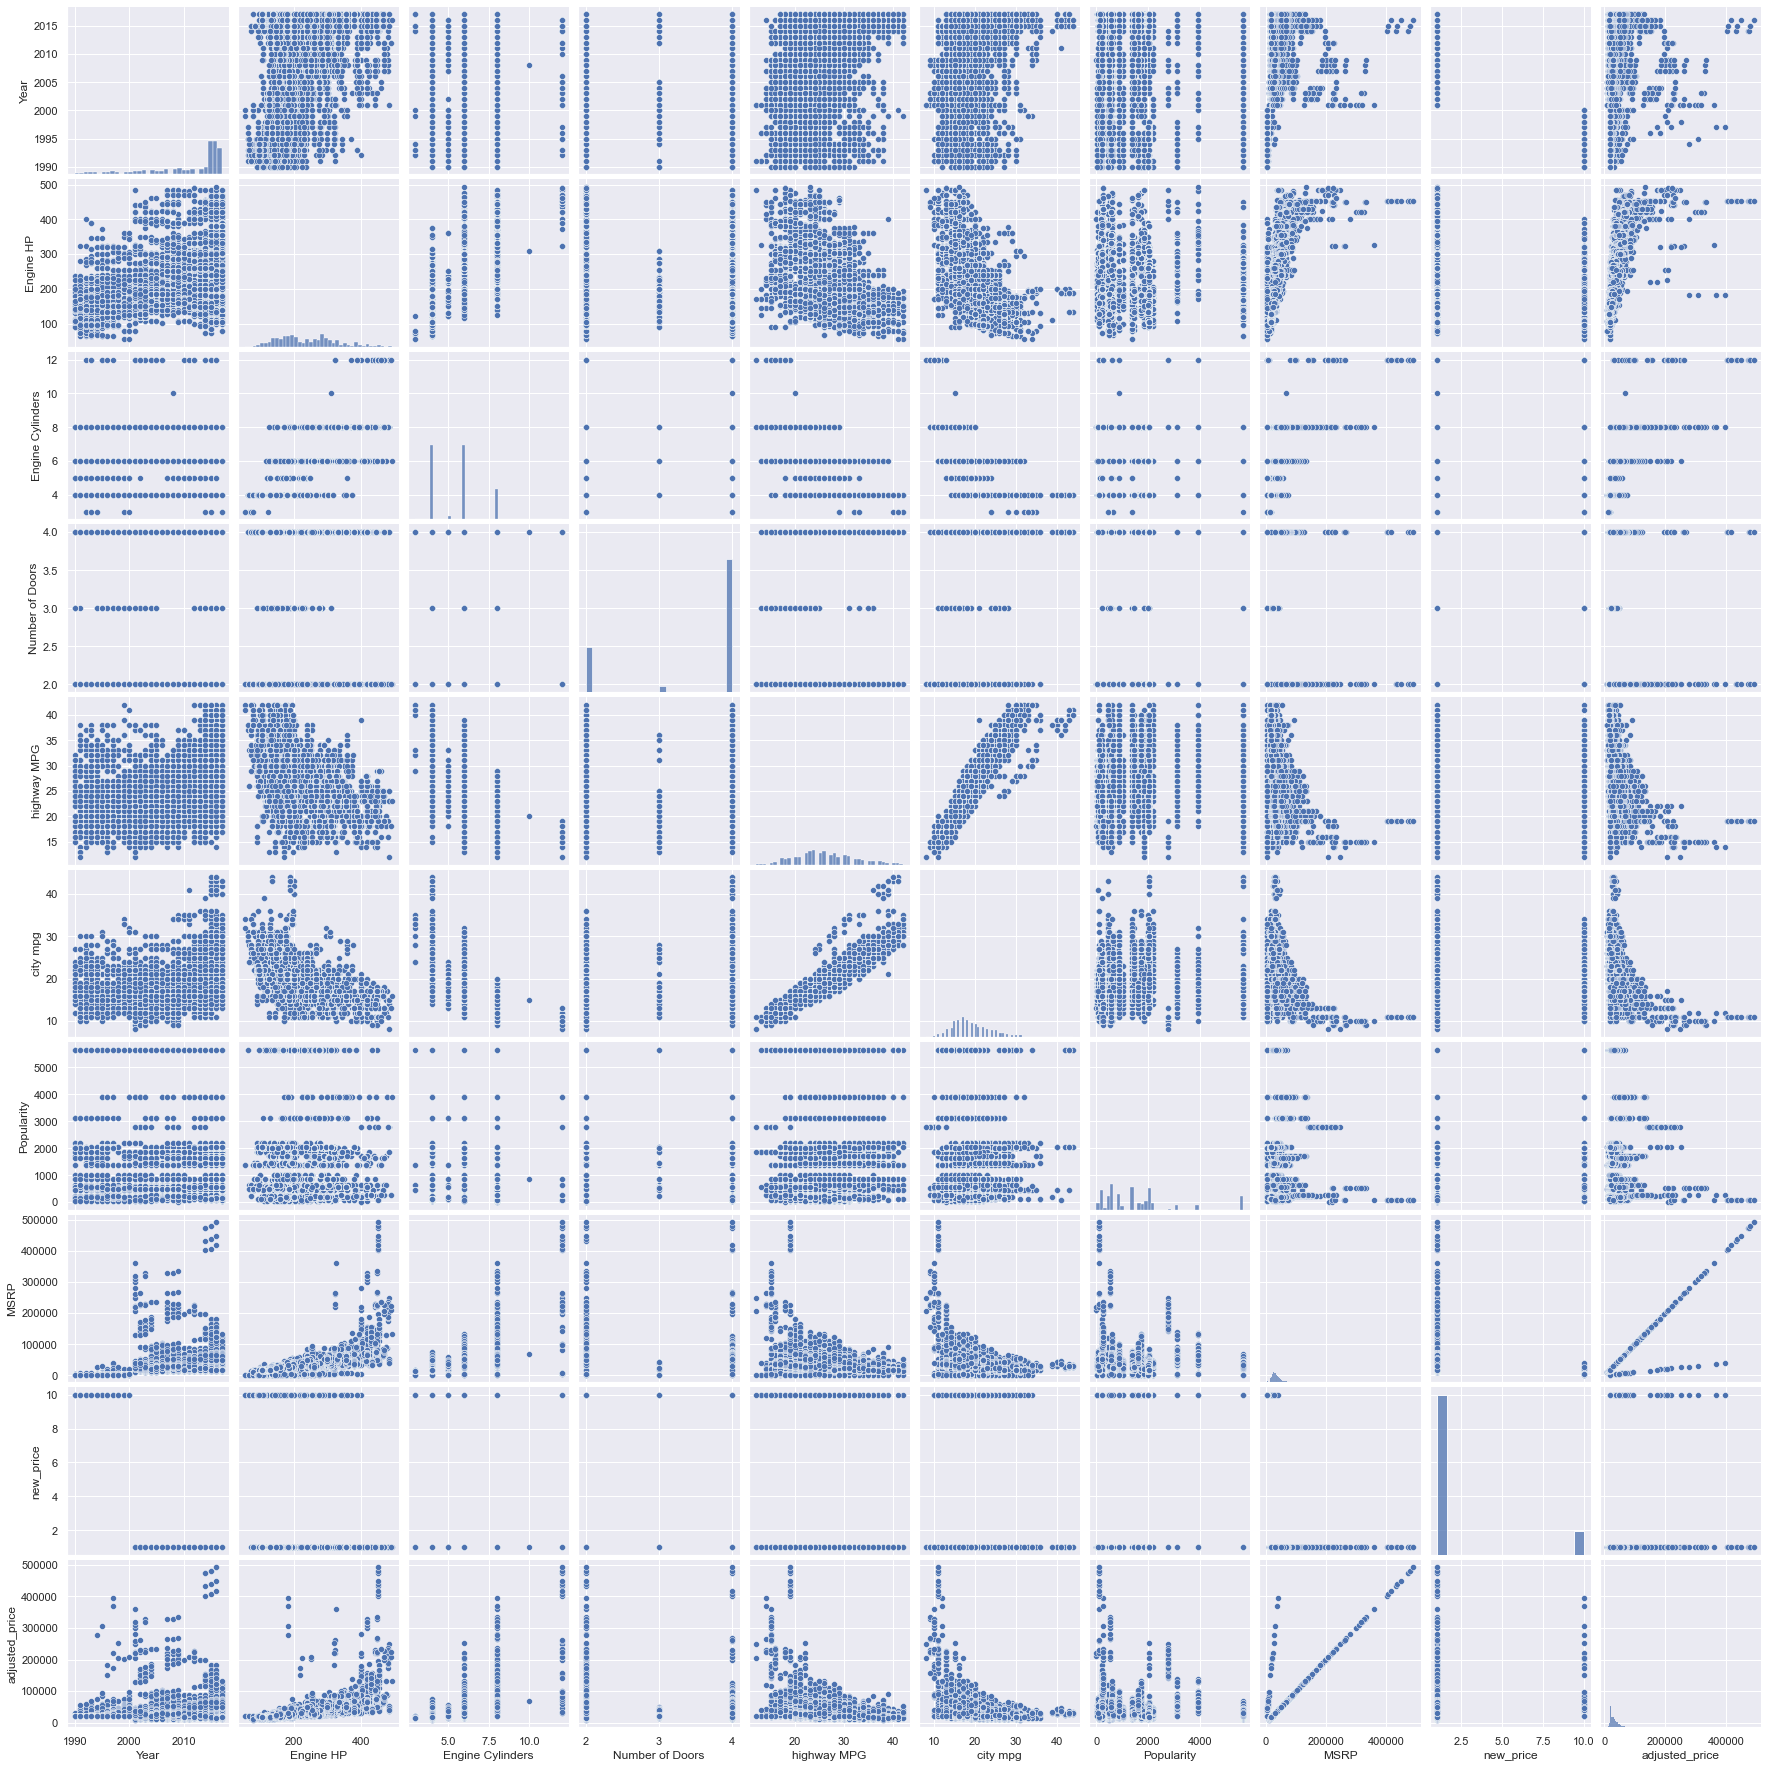

In [37]:
# Using a pairplot, display all of the linear relationship.
sns.pairplot(df)


In [38]:
# * Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).
explaination= """
The strongest linear relationship happend to be between highway MPG and city MPG
"""
print(explaination)



The strongest linear relationship happend to be between highway MPG and city MPG



# Find which features actually have the strongest linear relationship using correlations.
* Make a heatmap plot of all of the correlations in our dataset.
* Change the figure size of our heatmap plot to be 8x8
* __Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.__

In [39]:
#check df again
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,new_price,adjusted_price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,1,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650,1,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350,1,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450,1,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500,1,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,46120,1,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,56670,1,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50620,1,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50920,1,50920


<AxesSubplot:>

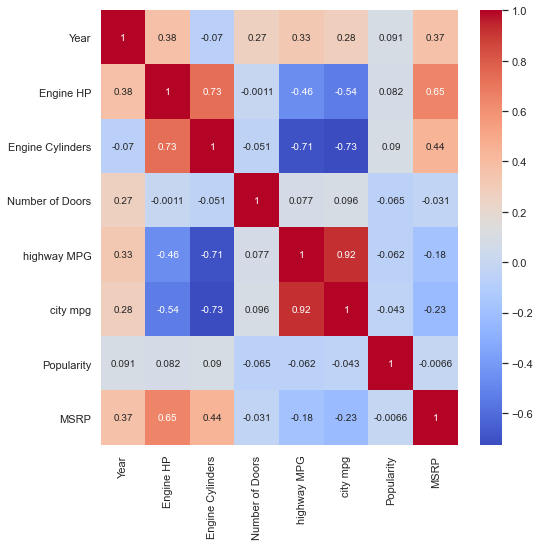

In [40]:
# * Make a heatmap plot of all of the correlations in our dataset.
# * Change the figure size of our heatmap plot to be 8x8

plt.figure(figsize = (8,8))
#Deleting the make up columns
df_heatmap = df.drop(['new_price', 'adjusted_price'], axis=1)
sns.heatmap(df_heatmap.corr(), annot=True, cmap='coolwarm')


In [41]:
# Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.

explaination='''
From the heatmap graph we see that the Engine Cylinders has a strongest relationship with Engine HP since  
their correlation is 0.73. This conclusion is because the engine are technicaly contains cylinders,
and both are functionaniny in the same direction.
'''

print(explaination)


From the heatmap graph we see that the Engine Cylinders has a strongest relationship with Engine HP since  
their correlation is 0.73. This conclusion is because the engine are technicaly contains cylinders,
and both are functionaniny in the same direction.



# [EXTRA CREDIT] 
* In the column names, replace all the spaces with an underscore, and make them all lowercase as well


In [42]:
# * In the column names, replace all the spaces with an underscore, and make them all lowercase as well

#let's check the columns
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Vehicle Size', 'Vehicle Style', 'highway MPG',
       'city mpg', 'Popularity', 'MSRP', 'new_price', 'adjusted_price'],
      dtype='object')

In [43]:
# First way to do it

df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.lower()
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'vehicle_size', 'vehicle_style', 'highway_mpg',
       'city_mpg', 'popularity', 'msrp', 'new_price', 'adjusted_price'],
      dtype='object')

In [44]:
#Another way to do it using filter

#showing the columns that contains space

list_columns=df.filter(
    like =' '
).columns
new_columns=[item.replace(' ','_') for item in list(list_columns)]

new_dict=dict(zip(list(list_columns),new_columns))
new_dict


{}

In [235]:
df.rename(
    columns=
         new_dict ,
  
    inplace = True
)
df.columns

Index(['Make', 'Model', 'Year', 'Engine_Fuel_Type', 'Engine_HP',
       'Engine_Cylinders', 'Transmission_Type', 'Driven_Wheels',
       'Number_of_Doors', 'Vehicle_Size', 'Vehicle_Style', 'highway_MPG',
       'city_mpg', 'Popularity', 'MSRP'],
      dtype='object')